In [ ]:
###Image Recognition with Trained Model
# Import the libraries
import numpy as np
# Importing os libraries so we can open folder on local storage
import os
# Import an object with methods to process image data
from keras.preprocessing import image

# Import the pre-trained model
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam

# We need to install libraries tensorflow
# pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
myFile = "/content/drive/MyDrive/mask_archive2.zip (Unzipped Files)/data"
fullPath = os.path.abspath("/content/drive/MyDrive/mask_archive2.zip (Unzipped Files)/data") 
data_for_processing = tf.keras.utils.get_file( fname= myFile,origin='file://'+fullPath)

In [ ]:
# Preparing variables for keras model

img_height,img_width=180,180
batch_size=32
number_classes = 2

In [ ]:
# Spliting our data set for training and test

# We split our data_for_processing and take 80% of available data and put it in train_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_for_processing,                          #               
  validation_split=0.3,                         # Optional float between 0 and 1, fraction of data to reserve for validation.  
  subset="training",                            # One of "training" or "validation". Only used if validation_split is set.
  seed=123,                                     # Optional random seed for shuffling and transformations.
  image_size=(img_height, img_width),           # Size to resize images to after they are read from disk. Defaults to (256, 256)
  batch_size=batch_size)                        # Size of the batches of data. Default: 32. If None, the data will not be batched

# We split our data_for_processing and take 20% of available data and put it in val_ds
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_for_processing,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7553 files belonging to 2 classes.
Using 5288 files for training.
Found 7553 files belonging to 2 classes.
Using 2265 files for validation.


In [ ]:
class_names = train_ds.class_names

print(class_names)

['with_mask', 'without_mask']


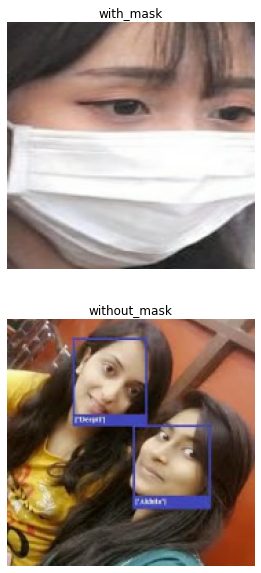

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(2):
    # plt.subplot(Three integers (nrows, ncols, index).)
    plt.subplot(2, 1, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Initializing Sequential() model to Inception_model

inception_model = Sequential()

# Instantiates the InceptionV3 architecture.

pretrained_model= tf.keras.applications.InceptionV3(
                include_top=False,                              # Whether to include the fully-connected layer at the top of the network.
                input_shape=(img_height,img_width,3),           # Optional shape tuple, only to be specified if include_top is False
                pooling='avg',                                  # Optional pooling mode for feature extraction when include_top is False. avg means that global average pooling will be applied to the output of the last convolutional block, and thus the output of the model will be a 2D tensor.
                classes=number_classes,                                      # Optional number of classes to classify images into, only to be specified if include_top is True
                weights='imagenet')                            # 'imagenet' (pre-training on ImageNet) None

for layer in pretrained_model.layers:
        layer.trainable=False
# Adding pre trained inceptionv3 model to our..
inception_model.add(pretrained_model)



In [ ]:
# Further prepering model
# Flattens the input
inception_model.add(layers.Flatten())
# Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the 
# element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, 
# and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.
# Relu  (Rectified Linear Unit) Activation Function 
inception_model.add(layers.Dense(512, activation='relu'))
# Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, 
# where the probabilities of each value are proportional to the relative scale of each value in the vector.
# Output Shape 
inception_model.add(layers.Dense(number_classes, activation='softmax'))


inception_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 22,852,898
Trainable params: 1,050,114
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# Training a Model and Model Evaluation

# optimizer= Name of optimizer or optimizer instance. See tf.keras.optimizers.
# Adam(learning_rate=0.001) is optimizer we choose and imported
# loss = Loss function. Maybe be a string (name of loss function), or a tf.keras.losses.Loss instance. See tf.keras.losses. 
## A loss function is any callable with the signature
# parse_categorical_crossentropy = Computes the sparse categorical crossentropy loss.
# metrics = List of metrics to be evaluated by the model during training and testing
inception_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training a model with train_ds and val_ds and giving epochs = 10 where 10 number of iterations of training
history = inception_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
166/166 [==============================] - 520s 3s/step - loss: 0.9269 - accuracy: 0.7954 - val_loss: 0.4650 - val_accuracy: 0.8230
Epoch 2/10
166/166 [==============================] - 500s 3s/step - loss: 0.5358 - accuracy: 0.8024 - val_loss: 0.3972 - val_accuracy: 0.8336
Epoch 3/10
166/166 [==============================] - 531s 3s/step - loss: 0.4409 - accuracy: 0.8198 - val_loss: 0.3848 - val_accuracy: 0.8375
Epoch 4/10
166/166 [==============================] - 552s 3s/step - loss: 0.3447 - accuracy: 0.8480 - val_loss: 0.3619 - val_accuracy: 0.8397
Epoch 5/10
166/166 [==============================] - 533s 3s/step - loss: 0.3893 - accuracy: 0.8287 - val_loss: 0.3929 - val_accuracy: 0.8221
Epoch 6/10
166/166 [==============================] - 551s 3s/step - loss: 0.3314 - accuracy: 0.8516 - val_loss: 0.4806 - val_accuracy: 0.7872
Epoch 7/10
166/166 [==============================] - 669s 4s/step - loss: 0.3557 - accuracy: 0.8472 - val_loss: 0.3610 - val_accuracy: 0.8455

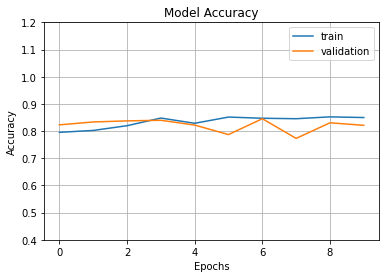

In [ ]:
# Visualization of model metrics

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1.2)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#inception_model.save_weights("my_inception_model_weights.h5")
inception_model.save("inceptionV3_model.h5")

In [ ]:
# Predicting image if person is wearing a mask or not

# Formating picture to be apropriate for model to predict
imageSize=[img_height,img_width]
imageLocation = "/content/drive/MyDrive/mask_archive2.zip (Unzipped Files)/data/with_mask/with_mask_1899.jpg"
predictImage = tf.keras.preprocessing.image.load_img(
    imageLocation, 
    target_size=imageSize
)
img_array = tf.keras.preprocessing.image.img_to_array(predictImage)
# Expading dims again to apropriate for modelo
img_array = tf.expand_dims(img_array, 0)

# Making a prediction and dividing it with 255.0 to be able to represent likelihood in percentages
predictions = inception_model.predict(img_array)

score = predictions[0]

print(score)

[0.98250824 0.01749173]


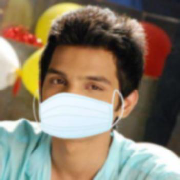

In [ ]:
predictImage 

In [ ]:
output_class=class_names[np.argmax(predictions)]
print("The predicted class is", output_class)

The predicted class is with_mask


In [54]:
import cv2

imageList = {
    0 : '/content/drive/MyDrive/mask_archive2.zip (Unzipped Files)/data/with_mask/with_mask_10.jpg',
    1 : '/content/drive/MyDrive/mask_archive2.zip (Unzipped Files)/data/without_mask/without_mask_1.jpg',
    2 : '/content/drive/MyDrive/mask_archive2.zip (Unzipped Files)/data/with_mask/with_mask_100.jpg',
    3 : '/content/drive/MyDrive/mask_archive2.zip (Unzipped Files)/data/without_mask/without_mask_100.jpg',
    4 : '/content/drive/MyDrive/mask_archive2.zip (Unzipped Files)/data/with_mask/with_mask_189.jpg',
    5 : '/content/drive/MyDrive/mask_archive2.zip (Unzipped Files)/data/without_mask/without_mask_1000.jpg'
}

for index, value in enumerate(imageList):
    image_for =cv2.imread(imageList[value])
    image_resized= cv2.resize(image_for, (img_width,img_height))
    image_for=np.expand_dims(image_resized,axis=0)
    pred=inception_model.predict(image_for)
    output_class=class_names[np.argmax(pred)]
    print("The predicted class is", output_class)

The predicted class is with_mask
The predicted class is without_mask
The predicted class is with_mask
The predicted class is without_mask
The predicted class is with_mask
The predicted class is without_mask
